<a href="https://colab.research.google.com/github/GiulioCMSanto/HDSIdent/blob/master/notebooks/SISO%20Systems/Potential%20Intervals/siso_bandpass_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SISO Potential Intervals: Bandpass Filter

[HDSIdent: Historical Data Segmentation for System Identification](https://github.com/GiulioCMSanto/HDSIdent)

This notebook explores how to obtain potential intervals for system identification through a Bandpass filter method, considering Single-Input Single-Output systems.

**How to reference this work?**

[SANTO, G. C. M. Data Mining Techniques Applied to Historical Data of Industrial Processes 
as a Tool to Find Time Intervals Suitable for System Identification. Masters dissertation 
– Polytechnic School of the University of São Paulo, São Paulo, Brasil, 2020. 
DOI: 10.13140/RG.2.2.13295.46240](https://www.researchgate.net/publication/347511108_Data_Mining_Techniques_Applied_to_Historical_Data_of_Industrial_Processes_as_a_Tool_to_Find_Time_Intervals_Suitable_for_System_Identification?channel=doi&linkId=5fdf5293a6fdccdcb8e856c4&showFulltext=true)


**About the Method**

The method here presented was proposed in the following work:

```
PATEL, A. Data Mining of Process Data in Mutlivariable Systems.
Degree project in electrical engineering — Royal Institute of Technology,
Stockholm, Sweden, 2016.
```

The implementation here presented, however, is also based on the following related works:

```
ARENGAS, D.; KROLL, A. A Search Method for Selecting Informative Data in Predominantly
Stationary Historical Records for Multivariable System Identification.
In: Proceedings of the 21st International Conference on System Theory,
Control and Computing (ICSTCC). Sinaia, Romenia: IEEE, 2017a. p. 100–105.

ARENGAS, D.; KROLL, A. Searching for informative intervals in predominantly stationary
data records to support system identification. In: Proceedings of the XXVI International
Conference on Information, Communication and Automation Technologies (ICAT). Sarajevo,
Bosnia-Herzegovina: IEEE, 2017b.

WANG, J. et al. Searching historical data segments for process identification
in feedback control loops. Computers and Chemical Engineering, v. 112, n. 6, p. 6–16, 2018.
```


**About the [Dataset](https://github.com/GiulioCMSanto/HDSIdent/tree/master/data/water_tank)**

The dataset here adopted was produced through simulation in the dissertation (SANTO, G. C. M., 2020). The dataset is created based on the work in (WANG et al., 2018). The transfer functions adopted in the simulation were directly extracted from (WANG et al., 2018 apud YU et al., 2011), as well as the simulation idea, where similar signals were produced.

**References**:

```
SANTO, G. C. M. Data Mining Techniques Applied to Historical Data of Industrial Processes 
as a Tool to Find Time Intervals Suitable for System Identification. Masters dissertation 
– Polytechnic School of the University of São Paulo, São Paulo, Brasil, 2020. 
DOI: 10.13140/RG.2.2.13295.46240.

WANG, J. et al. Searching historical data segments for process identification
in feedback control loops. Computers and Chemical Engineering, v. 112, n. 6, p. 6–16, 2018.

YU, Z. et al. Performance assessment of pid control loops subject to setpoint
changes. Journal of Process Control, v. 21, n. 8, p. 1164–1171, 2011.
````

In [ ]:
!git clone https://github.com/GiulioCMSanto/HDSIdent.git

fatal: destination path 'HDSIdent' already exists and is not an empty directory.


In [ ]:
# Change into the directory for install
%cd HDSIdent/

/content/HDSIdent/HDSIdent/HDSIdent


In [ ]:
!python setup.py install

python3: can't open file 'setup.py': [Errno 2] No such file or directory


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

import plotly
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode

plotly.io.renderers.default = 'colab'

%matplotlib inline
sns.set_style('darkgrid')

In [ ]:
from HDSIdent.data_treatment.data_preprocessing import Preprocessing
from HDSIdent.initial_intervals.bandpass_filter import BandpassFilter

## **1. Read Data**

In [ ]:
mv_url = 'https://raw.githubusercontent.com/GiulioCMSanto/HDSIdent/master/data/water_tank/siso_simu_mv.csv'
sp_url = 'https://raw.githubusercontent.com/GiulioCMSanto/HDSIdent/master/data/water_tank/siso_simu_sp.csv'
y_url = 'https://raw.githubusercontent.com/GiulioCMSanto/HDSIdent/master/data/water_tank/siso_simu_y.csv'

In [ ]:
mv = pd.read_csv(mv_url, error_bad_lines=False, header=None)
sp = pd.read_csv(sp_url, error_bad_lines=False, header=None)
y = pd.read_csv(y_url, error_bad_lines=False, header=None)

## **2. Data Pre-processing**

In [ ]:
pp = Preprocessing(
        scaler='MinMaxScaler',
        feature_range=(-0.5,0.5),
        k=100);

In [ ]:
X_clean, Y_clean = pp.fit_transform(X=np.concatenate([mv,sp],axis=1),
                                    y=y)

In [ ]:
df = pd.DataFrame()
df['MV'] = X_clean[:,0]
df['SP'] = X_clean[:,1]
df['Y'] = Y_clean

In [ ]:
df.head()

,MV,SP,Y
0,0.003182,-0.1,-0.109338
1,-0.000913,-0.1,-0.106037
2,-0.009513,-0.1,-0.099186
3,-0.012116,-0.1,-0.097125
4,-0.008668,-0.1,-0.099873


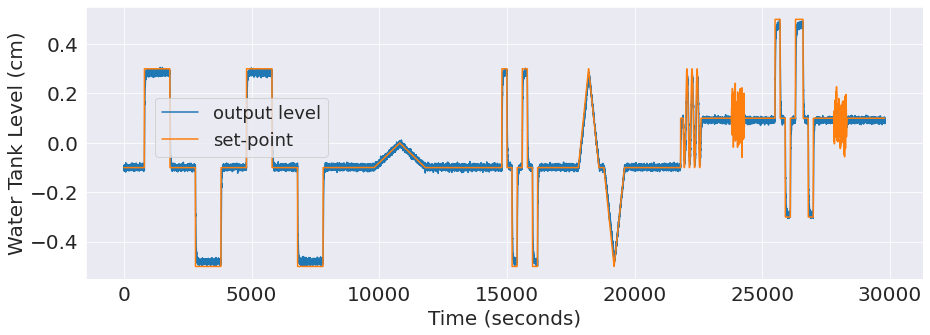

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(Y_clean,label="output level");
plt.plot(X_clean[:,1],label="set-point");
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.ylabel("Water Tank Level (cm)", fontsize=20);
plt.xlabel("Time (seconds)", fontsize=20);
plt.legend(fontsize=18,bbox_to_anchor=(0.3,0.7));

## **3. Bandpass Potential Intervals**

In [ ]:
BP = BandpassFilter(
       W=[0.006, 0.04],
       H=[0.02]*3,
       N=1
    )

In [ ]:
start = time()
BP.fit(X=df[['MV','SP']],y=df[['Y']]);
end = time()

In [ ]:
print("Execution Time: {}".format(end-start))

Execution Time: 1.2487366199493408


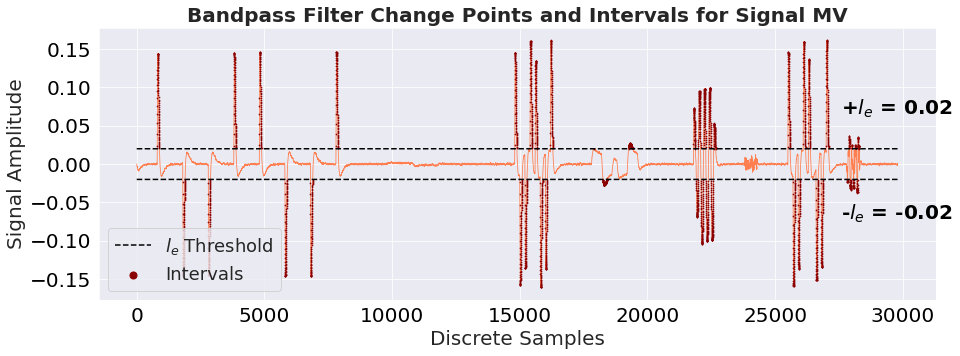

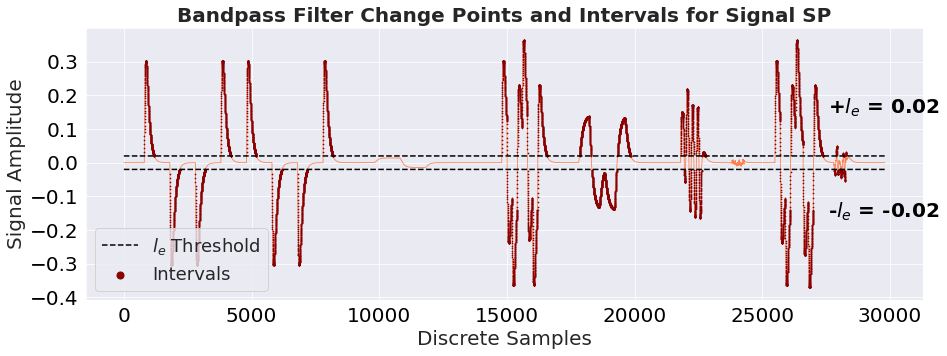

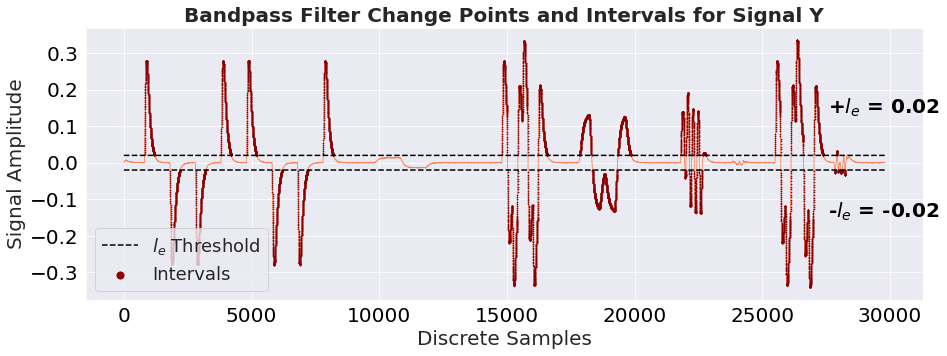

In [ ]:
BP.plot_change_points(X=df[['MV','SP']],y=df[['Y']],threshold_name=r'$l_{e}$')

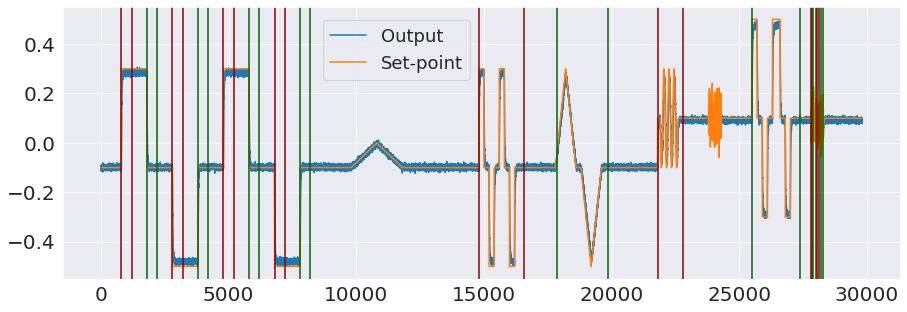

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(Y_clean, label="Output");
plt.plot(X_clean[:,1], label = "Set-point");
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);

counter = 2;
for key, interval in BP.unified_intervals.items():
    if counter%2==0:
        color = 'darkred'
    else:
        color = 'darkgreen'
        
    plt.axvline(np.min(interval),color=color);
    plt.axvline(np.max(interval),color=color);
    
    counter+=1

plt.legend(fontsize=18,bbox_to_anchor=(0.3,0.7));

## **4. Heatmap Analysis**

In [ ]:
def compute_grid_of_intervals(W1, W2, H):
  """
  This function receives an array of frequencies
  and returns the resulting number of intervals
  as well as their average length for each frequency 
  combination, considering a given error threshold H. 
  The set-point and the output variable are the ones 
  considered in this function.

  Arguments:
    W1: lower frequency vector
    W2: upper frequency vector
    H: deviation threshold
  
  Output:
    len_intervals_mtx: a matrix of interval lengths for each
    frequency combination
  """
  W1_grid, W2_grid = np.meshgrid(W1, W2)
  num_intervals_mtx = np.zeros((W1_grid.shape[0],W1_grid.shape[1]))
  len_intervals_mtx = np.zeros((W1_grid.shape[0],W1_grid.shape[1]))

  counter = 0
  for idx_1 in range(W1_grid.shape[0]):
      for idx_2 in range(W1_grid.shape[1]):
          
          counter+=1
          
          if counter%20==0:
              print("Iteration {}/{}".format(counter,W1_grid.shape[0]*W1_grid.shape[1]))
      
          W1 = W1_grid[idx_1,idx_2]
          W2 = W2_grid[idx_1,idx_2]
          

          BP = BandpassFilter(
                W=[W1, W2],
                H=[H]*3,
                N=1
              ) 
          
          intervals = BP.fit(X=df[['SP']],y=df[['Y']]);

          num_intervals_mtx[idx_1,idx_2] = len(intervals.keys())
          
          len_arr = []
          for key, value in intervals.items():
              len_arr.append(len(value))
              
          len_intervals_mtx[idx_1,idx_2] = np.mean(len_arr)
          
  len_intervals_mtx = np.nan_to_num(len_intervals_mtx,0)  

  return len_intervals_mtx, num_intervals_mtx

In [ ]:
def plot_grid(W1, W2, intervals_mtx, zmin, zmax, title):
  """
  This function plots a grid of interval metrics
  provided in the intervals_mtx variable.

  Arguments:
    W1: lower frequency vector
    W2: upper frequency vector
    num_intervals_mtx: matrix of interval lengths
    zmin: axis minimum size
    zmax: axis maximum size
    title: plot title
  """
  fig = go.Figure(data =
    go.Contour(
          z=intervals_mtx,
          x=W1, # horizontal axis
          y=W2, # vertical axis,
          zmin=zmin,
          zmax=zmax,
          colorscale='bugn',
                  contours=dict(
              showlabels = True, # show labels on contours
              labelfont = dict( # label font properties
                  size = 26,
                  color = 'black',
              )
      )))

  fig.update_layout(
      autosize=False,
      width=500,
      height=500,
      title={'text':title,
             'y':0.9,
             'x':0.5,
             'xanchor': 'center',
             'yanchor': 'top'},
      xaxis_title=r"$\Large \text{Frequency } w_{1} \text{ (Rad/s)}$",
      yaxis_title=r"$\Large \text{Frequency } w_{2} \text{ (Rad/s)}$",
      font=dict(
          family="Times New Roman",
          size=18,
          color="black"
      ),
  )

  fig.show()

### **4.1 Heatmap for a threshold $l_{e} = 0.005$**

In [ ]:
W1 = [0.0001, 0.0002, 0.0004, 0.0006, 0.0008, 0.001, 0.0012, 0.0014, 0.0015]
W2 = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
len_intervals_mtx, num_intervals_mtx = compute_grid_of_intervals(W1=W1, W2=W2, H=0.005)

Iteration 20/135
Iteration 40/135
Iteration 60/135
Iteration 80/135
Iteration 100/135
Iteration 120/135


In [ ]:
plot_grid(W1, W2, num_intervals_mtx, zmin=0, zmax=40, title="Number of Intervals VS Filter Frequencies")

In [ ]:
plot_grid(W1, W2, len_intervals_mtx, zmin=0, zmax=6000, title="Length of Intervals VS Filter Frequencies")

### **4.2 Heatmap for a threshold $l_{e} = 0.02$**

In [ ]:
W1 = [0.0001, 0.0002, 0.0004, 0.0006, 0.0008, 0.001, 0.0012, 0.0014, 0.0015]
W2 = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
len_intervals_mtx, num_intervals_mtx = compute_grid_of_intervals(W1=W1, W2=W2, H=0.02)

Iteration 20/135
Iteration 40/135
Iteration 60/135
Iteration 80/135
Iteration 100/135
Iteration 120/135


In [ ]:
plot_grid(W1, W2, num_intervals_mtx, zmin=0, zmax=40, title="Number of Intervals VS Filter Frequencies")

In [ ]:
plot_grid(W1, W2, len_intervals_mtx, zmin=0, zmax=6000, title="Length of Intervals VS Filter Frequencies")

### **4.3 Heatmap for a threshold $l_{e} = 0.1$**

In [ ]:
W1 = [0.0001, 0.0002, 0.0004, 0.0006, 0.0008, 0.001, 0.0012, 0.0014, 0.0015]
W2 = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
len_intervals_mtx, num_intervals_mtx = compute_grid_of_intervals(W1=W1, W2=W2, H=0.1)

Iteration 20/135
Iteration 40/135
Iteration 60/135
Iteration 80/135
Iteration 100/135
Iteration 120/135


In [ ]:
plot_grid(W1, W2, num_intervals_mtx, zmin=0, zmax=40, title="Number of Intervals VS Filter Frequencies")

In [ ]:
plot_grid(W1, W2, num_intervals_mtx, zmin=0, zmax=40, title="Number of Intervals VS Filter Frequencies")

In [ ]:
plot_grid(W1, W2, len_intervals_mtx, zmin=0, zmax=6000, title="Length of Intervals VS Filter Frequencies")

## **5. Impact on Step Responses**

### **5.1 Applying the algorithm without any changes**

In [ ]:
BP = BandpassFilter(
       W=[0.006, 0.04],
       H=[0.02]*3,
       N=1
    )

start = time()
BP.fit(X=df[['MV','SP']],y=df[['Y']]);
end = time()

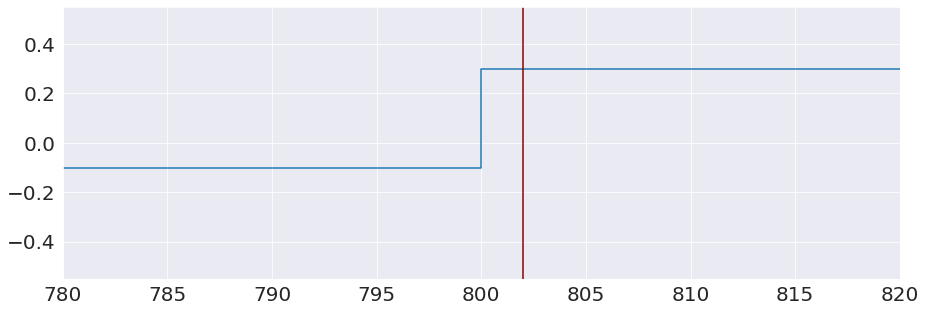

In [ ]:
plt.figure(figsize=(15,5))
plt.step(range(0,len(X_clean[:,1])),X_clean[:,1], label = "Set-point");
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);

counter = 2;
for key, interval in BP.unified_intervals.items():
    if counter%2==0:
        color = 'darkred'
    else:
        color = 'darkgreen'
        
    plt.axvline(np.min(interval),color=color);
    plt.axvline(np.max(interval),color=color);
    
    counter+=1

plt.xlim([780,820]);

### **5.2 Applying the algorithm with num_previous_indexes = 10**

In [ ]:
BP = BandpassFilter(
       W=[0.006, 0.04],
       H=[0.02]*3,
       N=1,
       num_previous_indexes=10
    )

start = time()
BP.fit(X=df[['MV','SP']],y=df[['Y']]);
end = time()

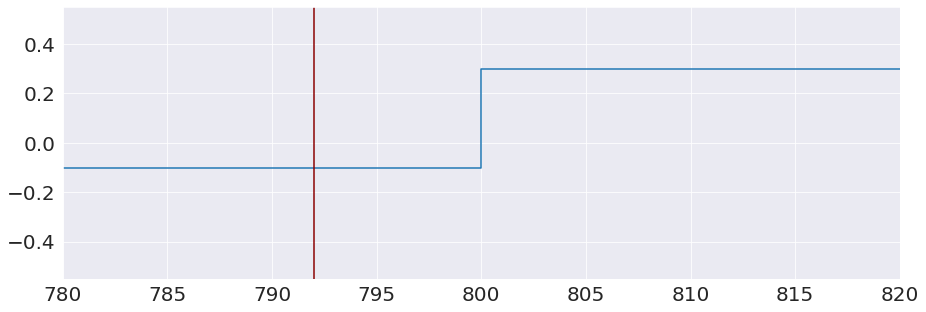

In [ ]:
plt.figure(figsize=(15,5))
plt.step(range(0,len(X_clean[:,1])),X_clean[:,1], label = "Set-point");
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);

counter = 2;
for key, interval in BP.unified_intervals.items():
    if counter%2==0:
        color = 'darkred'
    else:
        color = 'darkgreen'
        
    plt.axvline(np.min(interval),color=color);
    plt.axvline(np.max(interval),color=color);
    
    counter+=1

plt.xlim([780,820]);